In [2]:
from google.colab import files
uploaded = files.upload()

Saving results.csv to results.csv


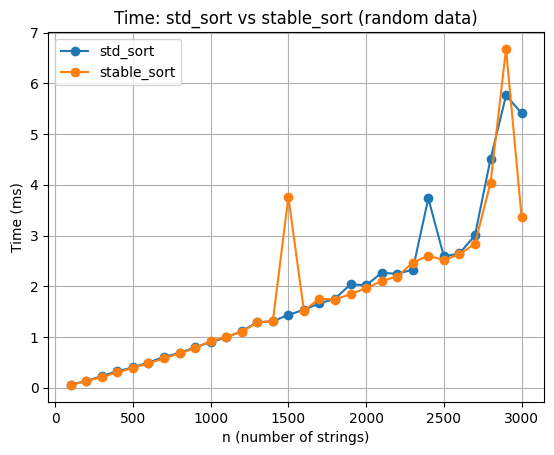

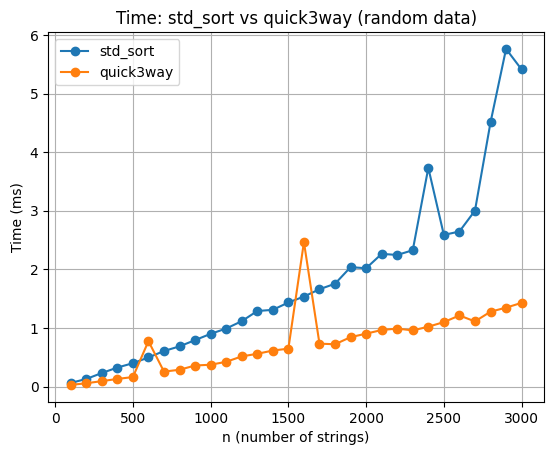

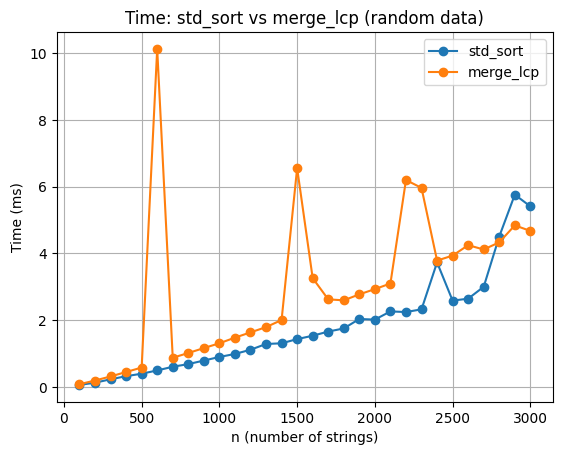

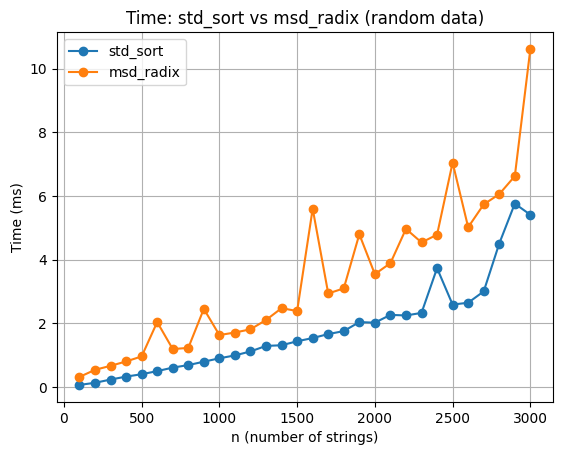

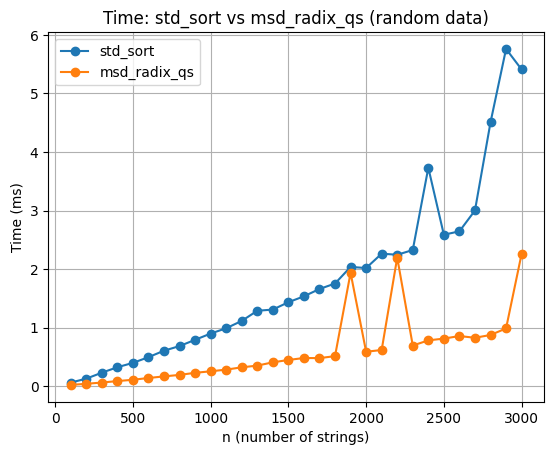

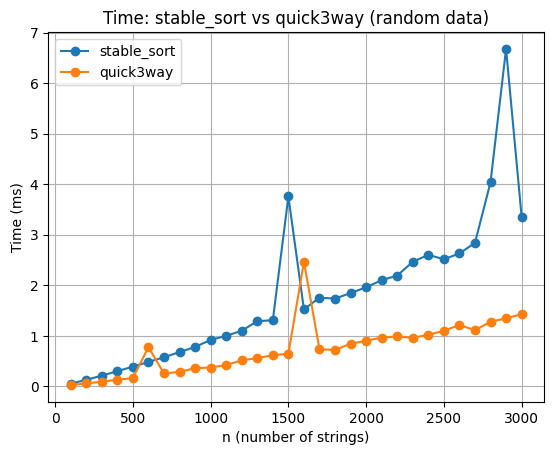

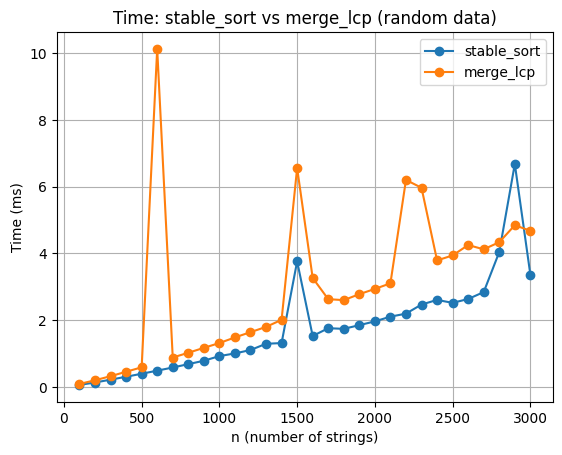

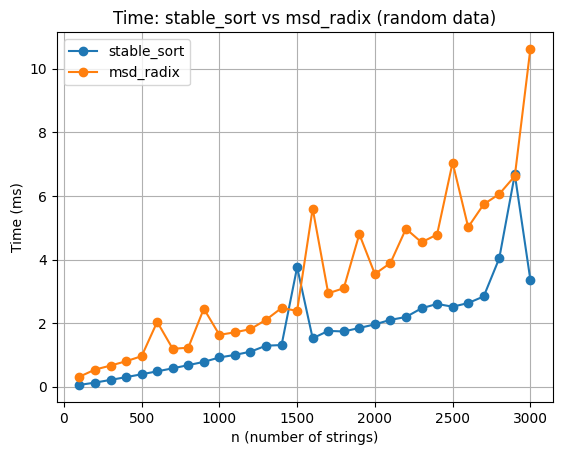

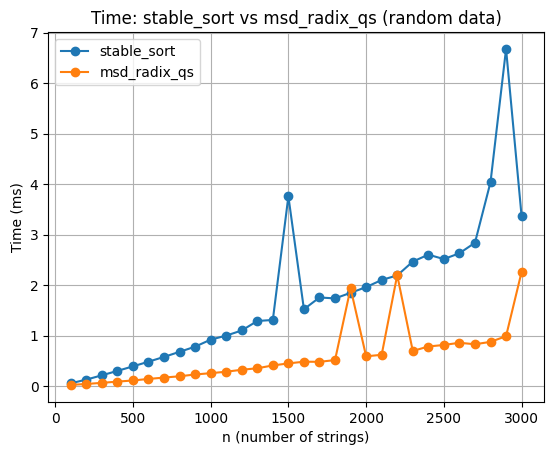

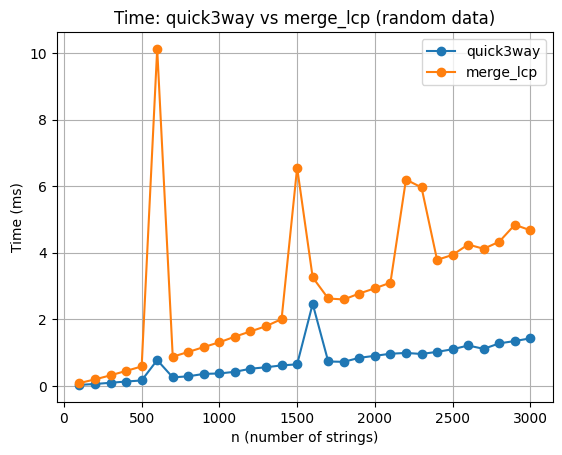

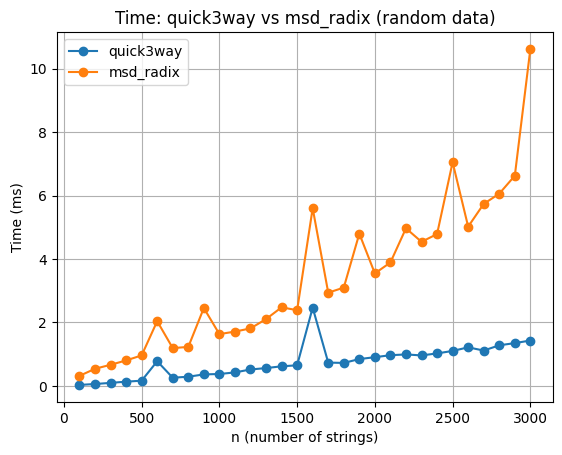

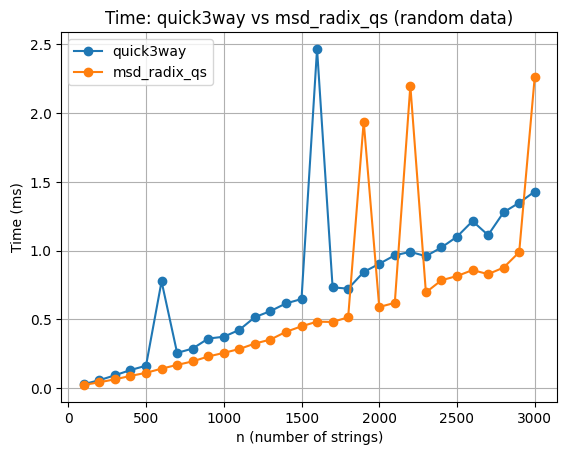

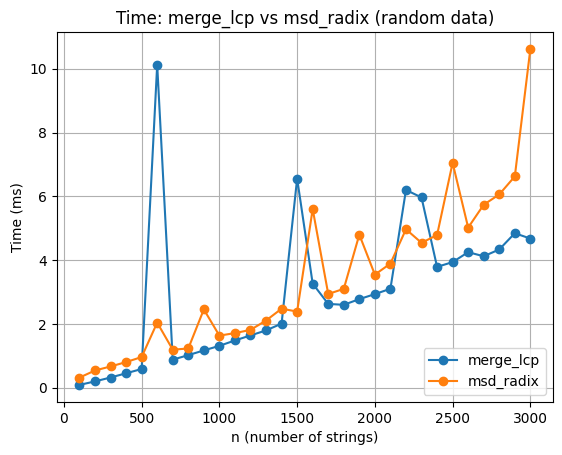

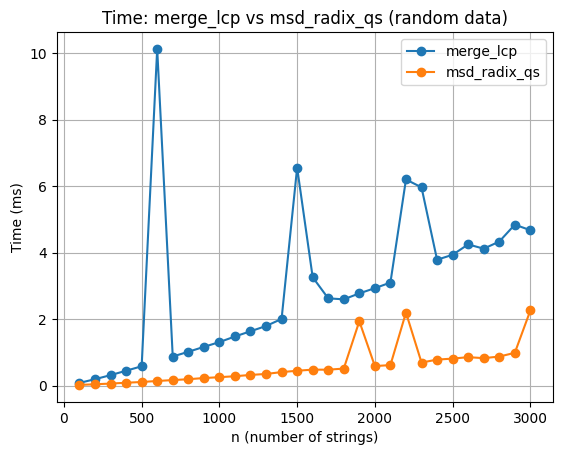

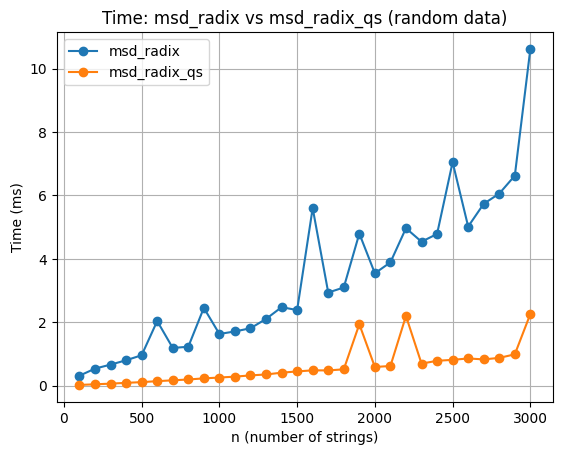

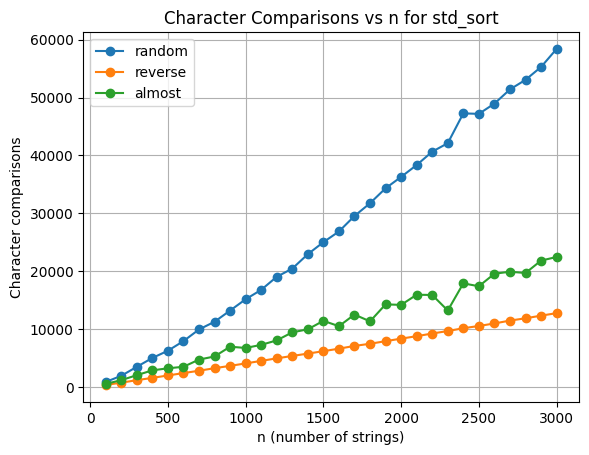

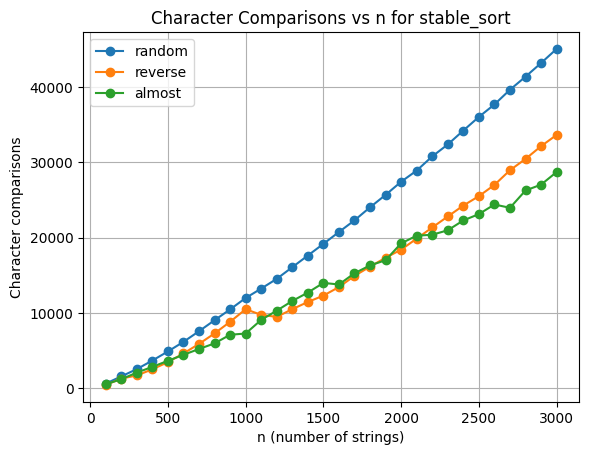

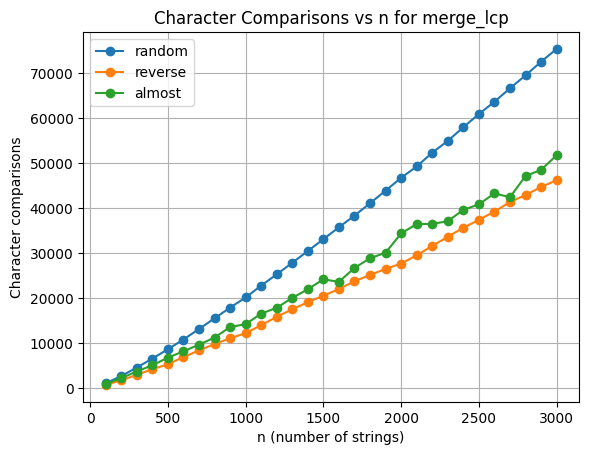

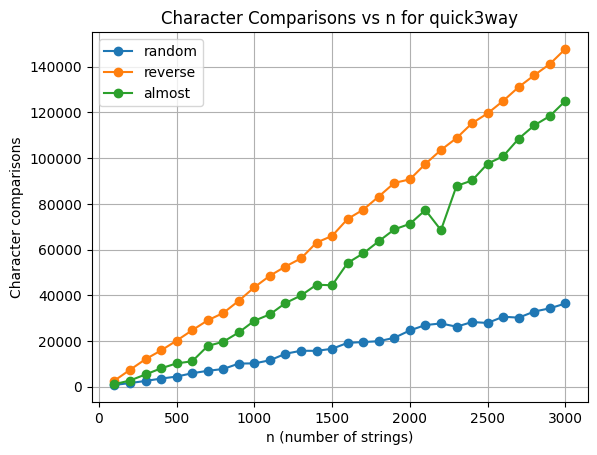

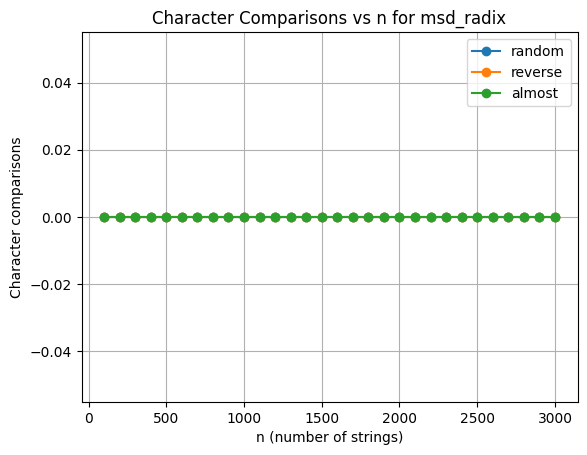

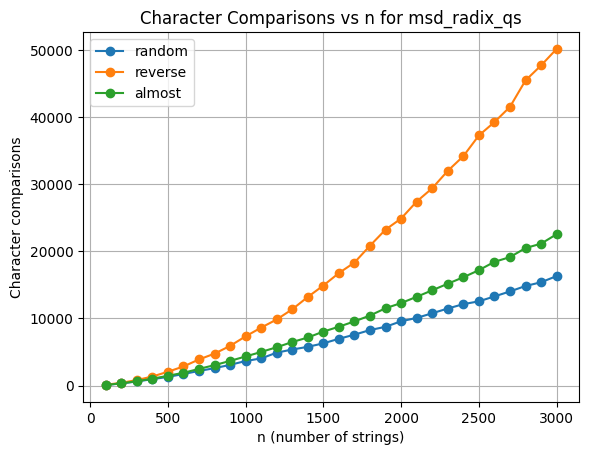

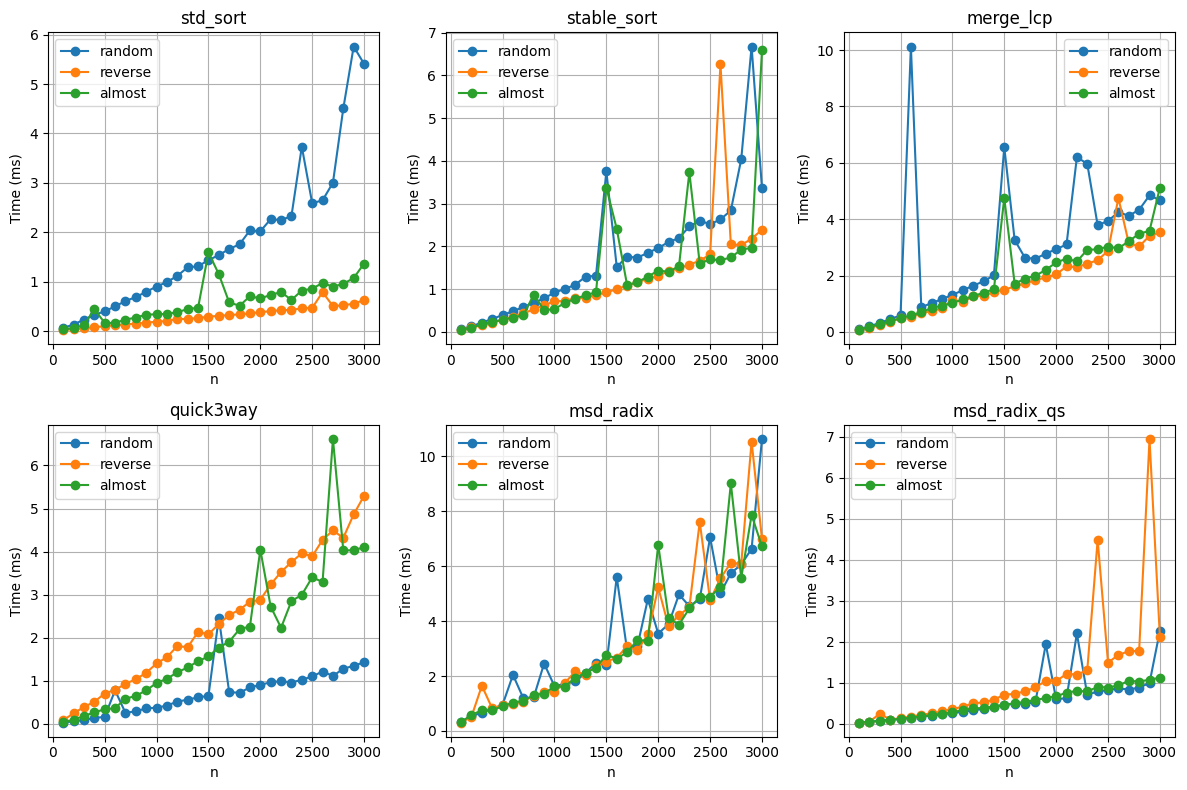

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Загрузка результатов
df = pd.read_csv('results.csv')

# 1) Графики времени для всех пар алгоритмов на случайных данных
pairs = [
    ('std_sort', 'stable_sort'),
    ('std_sort', 'quick3way'),
    ('std_sort', 'merge_lcp'),
    ('std_sort', 'msd_radix'),
    ('std_sort', 'msd_radix_qs'),
    ('stable_sort', 'quick3way'),
    ('stable_sort', 'merge_lcp'),
    ('stable_sort', 'msd_radix'),
    ('stable_sort', 'msd_radix_qs'),
    ('quick3way', 'merge_lcp'),
    ('quick3way', 'msd_radix'),
    ('quick3way', 'msd_radix_qs'),
    ('merge_lcp', 'msd_radix'),
    ('merge_lcp', 'msd_radix_qs'),
    ('msd_radix', 'msd_radix_qs'),
]

for a1, a2 in pairs:
    plt.figure()
    for algo in (a1, a2):
        sub = df[(df['algorithm'] == algo) & (df['dataType'] == 'random')]
        plt.plot(sub['n'], sub['timeMs'], marker='o', label=algo)
    plt.title(f'Time: {a1} vs {a2} (random data)')
    plt.xlabel('n (number of strings)')
    plt.ylabel('Time (ms)')
    plt.legend()
    plt.grid(True)
    plt.show()

# 2) Графики посимвольных сравнений для каждого алгоритма (все типы данных)
for algo in df['algorithm'].unique():
    plt.figure()
    for dtype in df['dataType'].unique():
        sub = df[(df['algorithm'] == algo) & (df['dataType'] == dtype)]
        plt.plot(sub['n'], sub['comparisons'], marker='o', label=dtype)
    plt.title(f'Character Comparisons vs n for {algo}')
    plt.xlabel('n (number of strings)')
    plt.ylabel('Character comparisons')
    plt.legend()
    plt.grid(True)
    plt.show()

# 3) Подграфики времени по алгоритмам (каждый алгоритм в своём subplot)
algos = df['algorithm'].unique()
types = df['dataType'].unique()
cols = math.ceil(len(algos) / 2)
fig, axes = plt.subplots(nrows=2, ncols=cols, figsize=(4 * cols, 8))
axes = axes.flatten()

for ax, algo in zip(axes, algos):
    for dtype in types:
        sub = df[(df['algorithm'] == algo) & (df['dataType'] == dtype)]
        ax.plot(sub['n'], sub['timeMs'], marker='o', label=dtype)
    ax.set_title(algo)
    ax.set_xlabel('n')
    ax.set_ylabel('Time (ms)')
    ax.legend()
    ax.grid(True)

# Убираем лишние пустые подграфики, если они есть
for i in range(len(algos), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
